#  yolov8n-widerface

## 0. requirements

Install Dependencies

In [ ]:
!pip install opencv-python ultralytics
!apt update && apt install wget unzip -y

Setup dataset

In [4]:
! bash ../scripts/prepare_dataset.sh

🚀 Running full WIDER FACE dataset preparation...
🔧 Step 1: Downloading and organizing...
🔧 Setting up WIDER FACE dataset for YOLO training...
📥 Downloading dataset...
--2025-07-02 23:00:19--  https://huggingface.co/datasets/CUHK-CSE/wider_face/resolve/main/data/WIDER_train.zip
Resolving huggingface.co (huggingface.co)... 108.158.104.75, 108.158.104.89, 108.158.104.59, ...
Connecting to huggingface.co (huggingface.co)|108.158.104.75|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/datasets/wider_face/e23b76129c825cafae8be944f65310b2e1ba1c76885afe732f179c41e5ed6d59?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27WIDER_train.zip%3B+filename%3D%22WIDER_train.zip%22%3B&response-content-type=application%2Fzip&Expires=1751518820&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc1MTUxODgyMH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9kYXRhc2V0cy93aWRlcl9mYWNlL2UyM2I3NjEyOWM4MjVjYWZhZTh

## 1. yolov8n loading

In [1]:
from ultralytics import YOLO

# 1. Load a COCO-pretrained YOLOv8n model
model = YOLO("../yolov8n-widerface-v1/best.pt")  # Path to your fine-tuned model
# 2. Display model info (optional)
model.info()


Model summary: 129 layers, 3,011,043 parameters, 0 gradients, 8.2 GFLOPs


(129, 3011043, 0, 8.1941504)

## 2. training over widerface dataset

Define extra parameters like fraction or time.

In [2]:
model.train(data="../datasets/widerface/data.yaml", epochs=50, imgsz=640, batch=16, name='yolov8n-widerface-v2', fraction=0.005, time=1)

Ultralytics 8.3.161  Python-3.9.21 torch-2.7.1+cpu CPU (Intel Core(TM) i7-8550U 1.80GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=../datasets/widerface/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=0.005, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=../yolov8n-widerface-v1/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n-widerface-v22, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, per

train: Scanning C:\Users\hp\Desktop\proyectos\ia-project-g6\datasets\widerface\labels\train... 64 images, 0 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<00:00, 535.20it/s]

train: New cache created: C:\Users\hp\Desktop\proyectos\ia-project-g6\datasets\widerface\labels\train.cache



c:\Users\hp\anaconda3\envs\venv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


val: Fast image access  (ping: 0.10.0 ms, read: 243.7109.1 MB/s, size: 110.1 KB)


val: Scanning C:\Users\hp\Desktop\proyectos\ia-project-g6\datasets\widerface\labels\val.cache... 3222 images, 4 backgrounds, 0 corrupt: 100%|██████████| 3226/3226 [00:00<?, ?it/s]

val: C:\Users\hp\Desktop\proyectos\ia-project-g6\datasets\widerface\images\val\21_Festival_Festival_21_604.jpg: 1 duplicate labels removed



c:\Users\hp\anaconda3\envs\venv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to c:\Users\hp\Desktop\proyectos\ia-project-g6\runs\detect\yolov8n-widerface-v22\labels.jpg... 


: 

## 3. run a prediction


image 1/1 /content/test.jpg: 448x640 6 faces, 224.9ms
Speed: 5.3ms preprocess, 224.9ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


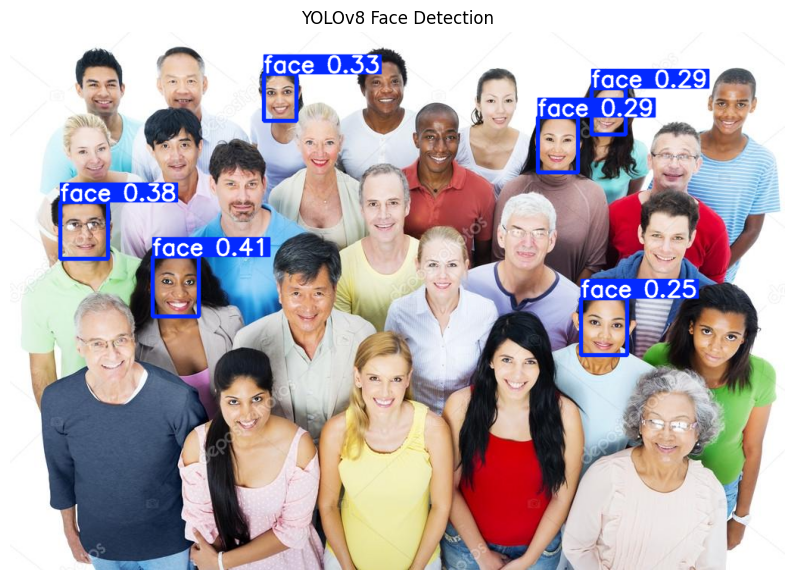

In [19]:

# Load your trained model
model = YOLO("runs/detect/yolov8n-widerface/weights/best.pt")

# Run inference
results = model("test.jpg")

# Plot predictions on the image
image_with_boxes = results[0].plot()  # returns a numpy image (BGR)

# Convert BGR (OpenCV) to RGB (matplotlib)
image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("YOLOv8 Face Detection")
plt.show()
